In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#load dataset
dataset_path = "Regression_Dataset.csv"
data = pd.read_csv(dataset_path)

In [7]:
X = data[["Machine_Weight_kg", "Machine_Age_years", "Maintenance_Score"]].values  # Features
y = data["Rental_Price_per_Hour"].values  # Target

In [8]:
# Normalizing
X = (X - X.mean(axis=0)) / X.std(axis=0)

# bias term (x0 = 1)
X = np.c_[np.ones(X.shape[0]), X]


theta = np.zeros(X.shape[1])  # Initialize thetas with zeros
alpha = 0.01  # Learning rate
iterations = 1000  # Number of gradient descent steps
m = len(y)  # Number of samples

# Cost function (Mean Squared Error)

In [9]:
def compute_cost(X, y, theta):
    predictions = X @ theta
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)  # Mean Squared Error
    return cost

# Gradient Descent function

In [10]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = []

    for _ in range(iterations):
        predictions = X @ theta  # Compute hypothesis
        error = predictions - y  # Compute errors
        gradient = (1 / m) * (X.T @ error)  # Compute gradient
        theta -= alpha * gradient  # Update parameters
        cost_history.append(compute_cost(X, y, theta))  # Track cost over iterations

    return theta, cost_history

Running Gradient Descent

In [11]:
theta_final, cost_history = gradient_descent(X, y, theta, alpha, iterations)

# Print final optimized parameters
print("\nOptimized Parameters after Gradient Descent:")
print(f"Intercept (θ₀): {theta_final[0]}")
print(f"Weight Coefficient (θ₁): {theta_final[1]}")
print(f"Age Coefficient (θ₂): {theta_final[2]}")
print(f"Maintenance Coefficient (θ₃): {theta_final[3]}")


Optimized Parameters after Gradient Descent:
Intercept (θ₀): 228.29434774612747
Weight Coefficient (θ₁): 82.37555422664681
Age Coefficient (θ₂): -20.732189162442985
Maintenance Coefficient (θ₃): 25.816966980242082


Plotting

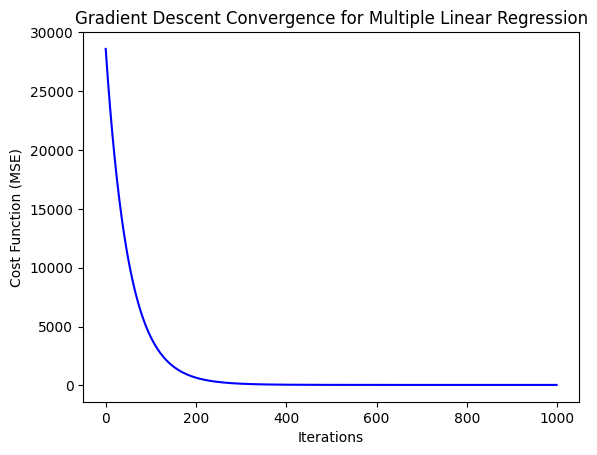

In [12]:
plt.plot(range(iterations), cost_history, color='blue')
plt.xlabel("Iterations")
plt.ylabel("Cost Function (MSE)")
plt.title("Gradient Descent Convergence for Multiple Linear Regression")
plt.show()